## Differential corrector demo for LSST heliolinc3d output

#### Import observation and cluster data into pandas dataframes
Inputs:
- observations.csv contains the dfObs dataframe used in the HelioLinC3D_demo.ipynb notebook on the LSST github's heliolinc2 repo (https://github.com/lsst-dm/heliolinc2)
- clusters.csv contains the dedupe dataframe output by the HelioLinC3D_demo.ipynb notebook on the LSST github's heliolinc2 repo (https://github.com/lsst-dm/heliolinc2)

Code to generate csv files (for use at the end of HelioLinC3D_demo.ipynb):
```python
# dfObs is the dataframe containing the initial observation data
dfObs.to_csv('observations.csv')
# dedupe is the dataframe containing deduplicated clusters output by heliolinc2
dedupe.to_csv('clusters.csv')
```


In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=np.inf)
import matplotlib.pyplot as plt

obsDF = pd.read_csv('inputs/observations.csv')
clstrDF = pd.read_csv('inputs/clusters.csv')

In [2]:
obsDF.head()

,Unnamed: 0,ObjID,FieldID,FieldMJD,AstRange(km),AstRangeRate(km/s),AstRA(deg),AstRARate(deg/day),AstDec(deg),AstDecRate(deg/day),...,SNR,AstrometricSigma(deg),MaginFilter,dmagDetect,AstRATrue(deg),AstDecTrue(deg),filter,class,obsName,obsId
0,0,S1005zBsa,322,59854.134964,3.903528e+08,18.438325,317.007162,-0.012928,-5.883793,-0.034805,...,15.131873,0.000012,20.706603,0.000562,317.007156,-5.883805,y,MBA,956799,0
1,1,S1004jwpa,323,59854.135412,3.213015e+08,17.699507,317.117346,-0.022249,-7.889578,-0.014036,...,21.476082,0.000009,20.411576,0.000289,317.117350,-7.889574,y,MBA,730551,1
2,2,S100d9mta,323,59854.135412,1.776728e+08,13.421910,317.269331,0.052952,-7.615268,0.072727,...,9.683597,0.000018,21.262543,0.003400,317.269335,-7.615288,y,MBA,2930217,2
3,3,S1008iFAa,323,59854.135412,3.466097e+08,15.576340,317.619736,-0.057787,-7.693811,-0.057932,...,14.401410,0.000012,20.672152,0.002806,317.619753,-7.693808,y,MBA,2971548,3
4,4,S10083vXa,323,59854.135412,2.432820e+08,15.256792,317.376144,0.034902,-7.314139,-0.091219,...,21.406557,0.000009,20.331998,0.004021,317.376134,-7.314126,y,MBA,2937313,4


In [3]:
clstrDF.head()

,Unnamed: 0,clusterId,obsId,trailId,r,drdt,cluster_epoch,x_ecl,y_ecl,z_ecl,vx_ecl,vy_ecl,vz_ecl,var_pos,var_vel,cluster_Id
0,0,3900,[ 2 59 693 1286 1656 1993 2363 27...,-1,2.2,-0.005,59862.067573,2.071965,-0.703196,0.227554,0.000146,0.016748,0.001647,1.245471e-07,3.132513e-09,0
1,1,3,[ 9 72 521 690 827 1362 1930 26...,-1,2.0,-0.006,59862.067573,1.915666,-0.547709,0.172322,-0.000847,0.018465,-0.002026,5.087235e-07,9.791802e-09,1
2,2,71043,[ 0 39 141 248 762 1140 1521 2340],-1,3.6,0.002,59862.067573,3.135354,-1.694481,0.510152,0.006237,0.007365,0.000792,1.513550e-07,2.514341e-09,2
3,3,26520,[ 1 70 2800 3465 5031 5101 5476 6787 7806],-1,2.8,0.004,59862.067573,2.528374,-1.164562,0.302156,0.007217,0.006441,0.001763,1.892683e-08,8.907136e-10,3
4,4,9936,[ 2 59 693 1286 1656 1993 2363],-1,2.4,-0.001,59862.067573,2.231005,-0.847060,0.260739,0.003962,0.013576,0.002578,1.304467e-07,2.067539e-09,4


Right now, each entry in the obsID column of clstr is a string, but it is supposed to be a list. So, let's convert...

In [4]:
for i, obsSet in enumerate(clstrDF['obsId']):
    obsSetRemovedChars = obsSet.replace('\n', '').replace('[', '').replace(']', '').split(' ')
    clstrDF.at[i, 'obsId'] = [int(obs) for obs in obsSetRemovedChars if obs]

In [5]:
clstrDF.head()

,Unnamed: 0,clusterId,obsId,trailId,r,drdt,cluster_epoch,x_ecl,y_ecl,z_ecl,vx_ecl,vy_ecl,vz_ecl,var_pos,var_vel,cluster_Id
0,0,3900,"[2, 59, 693, 1286, 1656, 1993, 2363, 2713, 348...",-1,2.2,-0.005,59862.067573,2.071965,-0.703196,0.227554,0.000146,0.016748,0.001647,1.245471e-07,3.132513e-09,0
1,1,3,"[9, 72, 521, 690, 827, 1362, 1930, 2653, 3481,...",-1,2.0,-0.006,59862.067573,1.915666,-0.547709,0.172322,-0.000847,0.018465,-0.002026,5.087235e-07,9.791802e-09,1
2,2,71043,"[0, 39, 141, 248, 762, 1140, 1521, 2340]",-1,3.6,0.002,59862.067573,3.135354,-1.694481,0.510152,0.006237,0.007365,0.000792,1.513550e-07,2.514341e-09,2
3,3,26520,"[1, 70, 2800, 3465, 5031, 5101, 5476, 6787, 7806]",-1,2.8,0.004,59862.067573,2.528374,-1.164562,0.302156,0.007217,0.006441,0.001763,1.892683e-08,8.907136e-10,3
4,4,9936,"[2, 59, 693, 1286, 1656, 1993, 2363]",-1,2.4,-0.001,59862.067573,2.231005,-0.847060,0.260739,0.003962,0.013576,0.002578,1.304467e-07,2.067539e-09,4


#### Select a cluster randomly and run the differential corrector to get orbit mean state and covariance

OD algorithm is based on Vallado (2007)

If convergence issues occur,
- If it seems like the RMS had a downward trend at the end, just increase the number of iterations
- If the RMS seems like it's not converging try varying the central differencing factor to a smaller value around 1e-9.

In [6]:
from modules.helper_funcs import au2km, day2sec, accumulate_observations_efficiently

In [7]:
clusterIdx = np.random.randint(0, len(clstrDF))
data = clstrDF.iloc[clusterIdx]
fitTime = float(data['cluster_epoch']) # epoch for orbit determination
fitGuess = np.array([float(data['x_ecl']), float(data['y_ecl']), float(data['z_ecl']), float(data['vx_ecl']), float(data['vy_ecl']), float(data['vz_ecl'])]) # initial guess for orbit determination
print(data)

obsArray = np.zeros((len(data['obsId']), 5))
for i, obs in enumerate(data['obsId']):
    rawObsData = obsDF.loc[obsDF['obsId']==obs]
    time = float(rawObsData['FieldMJD'])
    ra = np.deg2rad(float(rawObsData['AstRA(deg)']))
    dec = np.deg2rad(float(rawObsData['AstDec(deg)']))
    raSigma = np.deg2rad(float(rawObsData['AstrometricSigma(deg)']))
    decSigma = np.deg2rad(float(rawObsData['AstrometricSigma(deg)']))
    obsArray[i,:] = (time, ra, dec, raSigma, decSigma)
print(f"The cluster observation arc is {np.ptp(obsArray[:,0])*24:.2f} hours.")
print(obsArray)

Unnamed: 0                                                    1630
clusterId                                                    63497
obsId            [7258, 8428, 9006, 10058, 10484, 10619, 11084,...
trailId                                                         -1
r                                                              3.6
drdt                                                        -0.006
cluster_epoch                                         59862.067573
x_ecl                                                     3.194145
y_ecl                                                    -1.598385
z_ecl                                                     0.449055
vx_ecl                                                   -0.000286
vy_ecl                                                     0.01207
vz_ecl                                                   -0.002372
var_pos                                                        0.0
var_vel                                                       

[ 3.19578217e+00 -1.58413363e+00  4.47649662e-01  5.80614666e-03  6.90327314e-03 -1.19942572e-03]
[9446337.76965068 7972243.51325576 1869893.70203073]
12501458.568897944
[3.72107646 3.14190133 0.76887674]
4.930428524582173


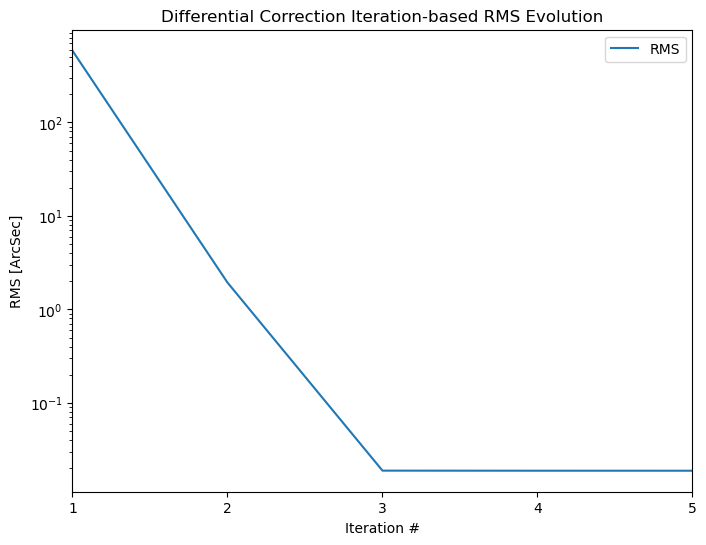

In [8]:
epoch = np.mean(obsArray[:,0]) # fitTime
x_nom = fitGuess.copy()
obs_array = obsArray.copy()

max_iter = 20 # maximum number of iterations to run for orbit fit
fd_pert = 1e-5 # factor to perturb nominal state element by when calculating partials using central differences
rms_change_limit = 5e-3 # if RMS change is less than this, consider the orbit fit converged and stop
min_iter = 5 # minimum number of iterations before any convergence criterion can stop the solution
min_RMS = 1 # maximum acceptable RMS value for a converged solution

rms_rad = np.inf*np.ones((max_iter,1)) # RMS array in radians
rms = np.inf*np.ones((max_iter,1)) # RMS array in ArcSec
del_rms = np.inf*np.ones((max_iter,1)) # array to store change in RMS at each iteration
state_arr = np.zeros((len(x_nom), max_iter)) # array to store nominal state at each iteration of the fit
i = 0
while abs(del_rms[i-1])>rms_change_limit or rms[i-1]>min_RMS or i<min_iter:
    P, a, w, b = accumulate_observations_efficiently(epoch, x_nom, obs_array, fd_pert) # perform one iteration of orbit fit
    delta_x = P @ (a.T @ w @ b) # calculate the update to the nominal state
    x_nom += delta_x.T[0] # update the nominal state
    state_arr[:,i] = x_nom.T # store nominal state at current iteration
    rms_rad[i] = np.sqrt(np.sum(b.T @ b)/(2*len(obs_array[:,0]))) # calculate and store RMS in radians
    rms[i] = np.rad2deg(rms_rad[i])*3600 # convert RMS to ArcSec and store
    if i > 0: del_rms[i] = (rms[i] - rms[i-1])/rms[i-1] # calculate change in RMS w.r.t. previous iteration
    i += 1
    if i >= max_iter: break
# end while
n_iter = i # number of iterations used for fitting the orbit
r_epoch = x_nom[:3] # postfit position at epoch
v_epoch = x_nom[3:6] # postfit velocity at epoch
variance = np.diag(P) # calculate the variance of the nominal state elements
st_dev = np.sqrt(variance) # calculate the standard deviation of the nominal state elements

print(x_nom) # nominal postfit state at epoch, position in au, velocity in au/day
print(st_dev[:3]*au2km) # standard deviation of position in km
print(np.linalg.norm(st_dev[:3]*au2km)) # standard deviation of position magnitude in km
print(st_dev[3:6]*au2km/day2sec) # standard deviation of velocity in km/s
print(np.linalg.norm(st_dev[3:6]*au2km/day2sec)) # standard deviation of velocity magnitude in km/s
# print(P) # covariance of the fit

plt.figure(figsize=(8,6), dpi=100)
plt.semilogy(np.arange(1,n_iter+1), rms[:n_iter], label = 'RMS')
plt.xlabel('Iteration #')
plt.xticks(np.arange(1,n_iter+1,1)) if n_iter <= 10 else plt.xticks(np.hstack((1,np.arange(5,n_iter+1,5))))
plt.xlim(1, n_iter)
plt.ylabel('RMS [ArcSec]')
plt.title('Differential Correction Iteration-based RMS Evolution')
plt.legend()
plt.show()

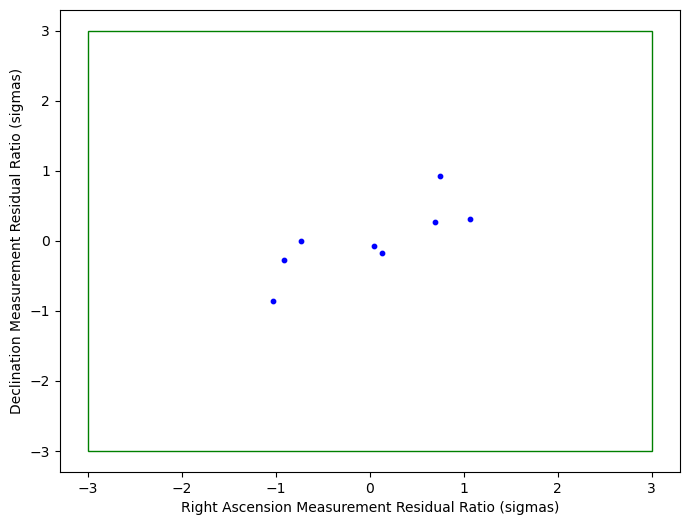

In [9]:
ra_resid_sigma_ratio = b[::2].ravel() / obsArray[:,3] # calculate the ratio of RA residual to its observation uncertainty
dec_resid_sigma_ratio = b[1::2].ravel() / obsArray[:,4] # calculate the ratio of DEC residual to its observation uncertainty

sigma_limit = 3
plt.figure(figsize=(8,6), dpi=100)
uncertainty_box = plt.Rectangle((-sigma_limit,-sigma_limit), 2*sigma_limit, 2*sigma_limit, fc='None', ec='green')
plt.gca().add_patch(uncertainty_box)
plt.scatter(ra_resid_sigma_ratio, dec_resid_sigma_ratio, s=10, c='blue')
plt.xlabel('Right Ascension Measurement Residual Ratio (sigmas)')
plt.ylabel('Declination Measurement Residual Ratio (sigmas)')
plt.show()